<a href="https://colab.research.google.com/github/nishanthini23bs/google-playstore-analytics/blob/main/Untitled5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving googleplaystore.csv to googleplaystore.csv


In [3]:
from google.colab import files
uploaded = files.upload()


Saving googleplaystore_user_reviews.csv to googleplaystore_user_reviews.csv


In [4]:
import pandas as pd

apps = pd.read_csv("googleplaystore.csv", encoding="ISO-8859-1")
reviews = pd.read_csv("googleplaystore_user_reviews.csv", encoding="ISO-8859-1")

print("Apps dataset shape:", apps.shape)
print("Reviews dataset shape:", reviews.shape)

apps.head()


Apps dataset shape: (10841, 13)
Reviews dataset shape: (64295, 5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Drop duplicates
apps = apps.drop_duplicates()

# Remove rows with missing ratings
apps = apps.dropna(subset=["Rating"])

# Clean Installs column (remove + and ,)
apps["Installs"] = apps["Installs"].str.replace("+","", regex=False).str.replace(",","", regex=False)
apps["Installs"] = pd.to_numeric(apps["Installs"], errors="coerce")

# Clean Price column (remove $ and convert to float)
apps["Price"] = apps["Price"].str.replace("$","", regex=False)
apps["Price"] = pd.to_numeric(apps["Price"], errors="coerce")

# Convert Reviews to numeric
apps["Reviews"] = pd.to_numeric(apps["Reviews"], errors="coerce")

# Drop rows with missing values after cleaning
apps = apps.dropna()

print("Cleaned dataset shape:", apps.shape)
apps.head()


Cleaned dataset shape: (8886, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
reviews = reviews.dropna(subset=["Translated_Review", "Sentiment"])
reviews.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [7]:
# Check dataset structure
print(apps.info())

# Summary statistics
print(apps.describe())

# Top categories
print(apps['Category'].value_counts().head(10))


<class 'pandas.core.frame.DataFrame'>
Index: 8886 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8886 non-null   object 
 1   Category        8886 non-null   object 
 2   Rating          8886 non-null   float64
 3   Reviews         8886 non-null   float64
 4   Size            8886 non-null   object 
 5   Installs        8886 non-null   float64
 6   Type            8886 non-null   object 
 7   Price           8886 non-null   float64
 8   Content Rating  8886 non-null   object 
 9   Genres          8886 non-null   object 
 10  Last Updated    8886 non-null   object 
 11  Current Ver     8886 non-null   object 
 12  Android Ver     8886 non-null   object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB
None
            Rating       Reviews      Installs        Price
count  8886.000000  8.886000e+03  8.886000e+03  8886.000000
mean      4.187959  4.730928e+05  1.650061e+0

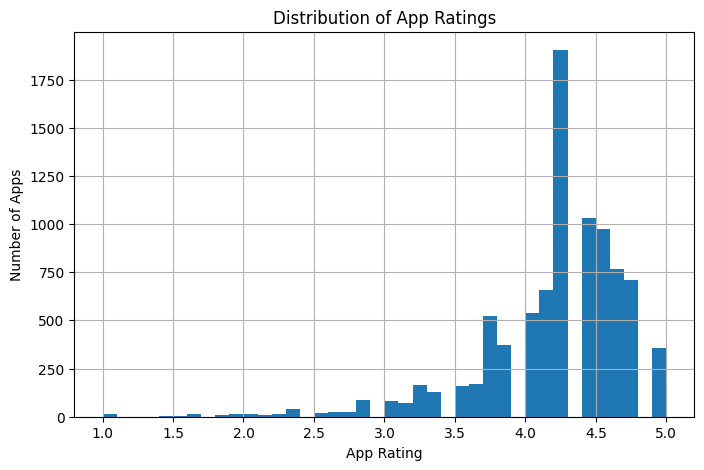

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
apps['Rating'].hist(bins=40)
plt.xlabel("App Rating")
plt.ylabel("Number of Apps")
plt.title("Distribution of App Ratings")
plt.show()


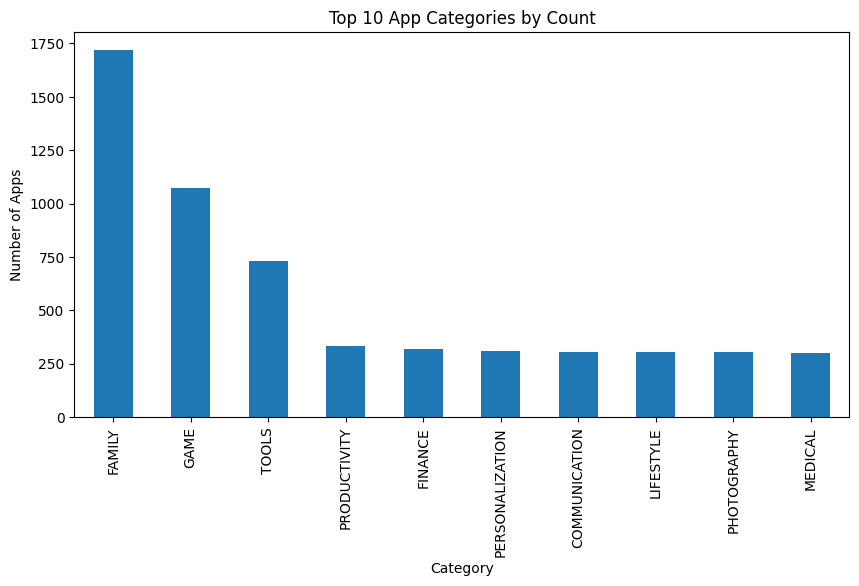

In [9]:
apps['Category'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 App Categories by Count")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()


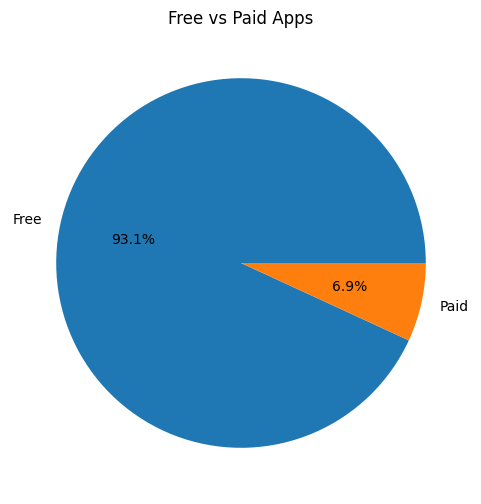

In [10]:
apps['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Free vs Paid Apps")
plt.ylabel("")
plt.show()


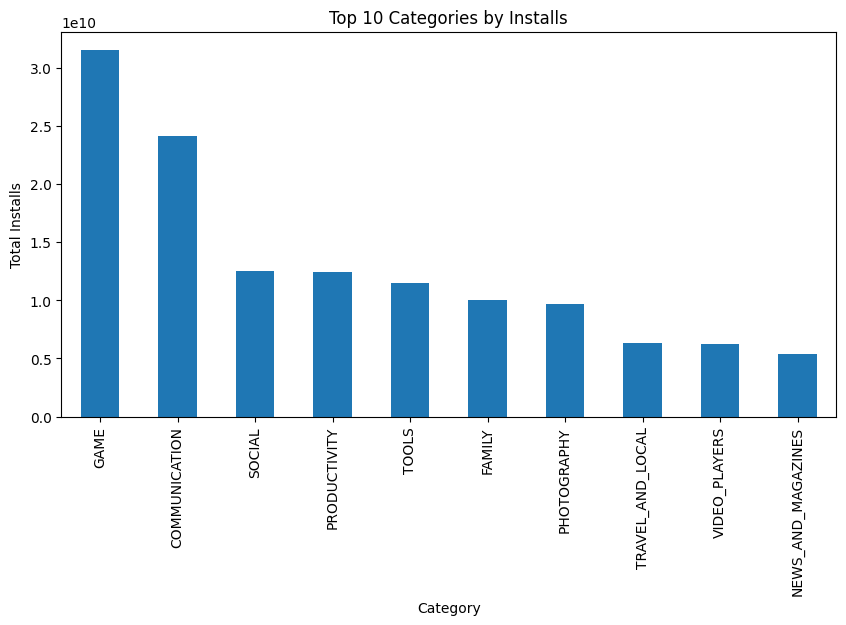

In [11]:
installs_by_cat = apps.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(10)

installs_by_cat.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Categories by Installs")
plt.xlabel("Category")
plt.ylabel("Total Installs")
plt.show()


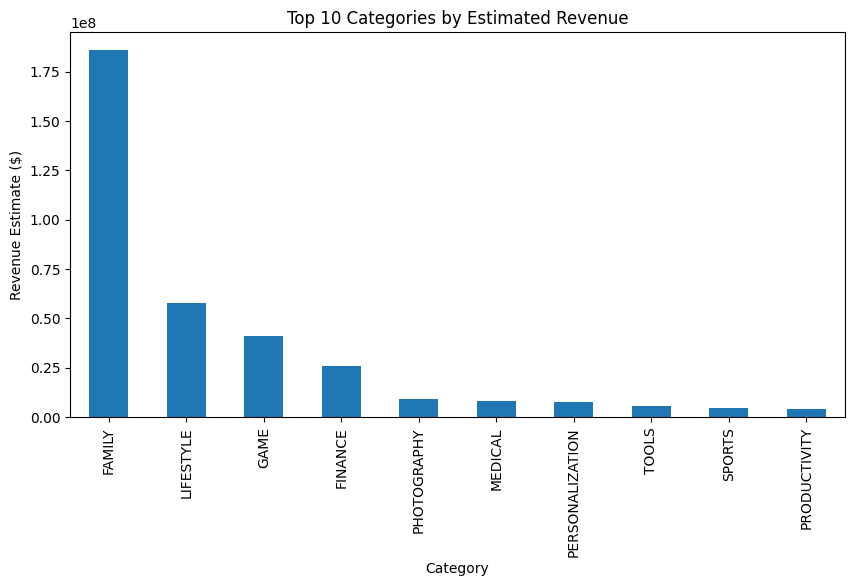

In [12]:
apps["Revenue_Estimate"] = apps["Price"] * apps["Installs"]

top_revenue = apps.groupby("Category")["Revenue_Estimate"].sum().sort_values(ascending=False).head(10)

top_revenue.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Categories by Estimated Revenue")
plt.xlabel("Category")
plt.ylabel("Revenue Estimate ($)")
plt.show()


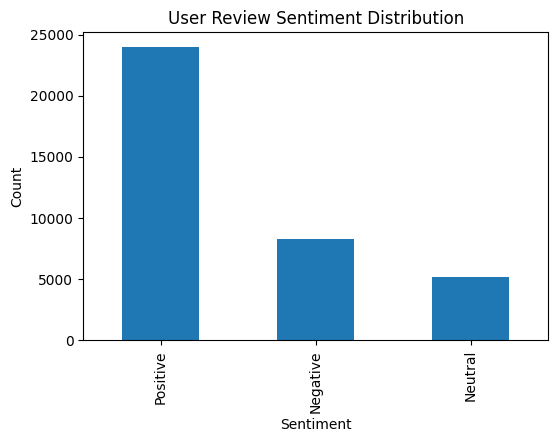

In [13]:
reviews['Sentiment'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title("User Review Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [14]:
import sqlite3

# Create SQLite DB
conn = sqlite3.connect("google_playstore.db")

# Save both datasets into SQL tables
apps.to_sql("apps", conn, if_exists="replace", index=False)
reviews.to_sql("reviews", conn, if_exists="replace", index=False)

conn.commit()
conn.close()

print("Data saved successfully to SQLite database: google_playstore.db")


Data saved successfully to SQLite database: google_playstore.db


In [15]:
from google.colab import files
files.download("google_playstore.db")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# If you still have the 'apps' DataFrame in Colab:
apps.to_csv("cleaned_playstore.csv", index=False)

# (Optional) a few helper summaries if you want separate sources
apps.groupby("Category").agg(
    total_apps=('App','count'),
    total_installs=('Installs','sum'),
    avg_rating=('Rating','mean')
).reset_index().to_csv("category_summary.csv", index=False)


In [18]:
from google.colab import files
files.download("cleaned_playstore.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>